<a href="https://colab.research.google.com/github/chandini2595/Dimensionality_Reduction/blob/main/Dimensionality_Reduction_Tabular_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.5 MB/s eta 0:00:00


In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA, FactorAnalysis
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, MDS
import umap.umap_ as umap
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Interactive visualization
import plotly.express as px

# Set visualization aesthetics
sns.set(style="whitegrid")

In [3]:
# Load datasets
wine = datasets.load_wine()
breast_cancer = datasets.load_breast_cancer()
digits = datasets.load_digits()

# Convert to DataFrame for better handling
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
bc_df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
digits_df = pd.DataFrame(data=digits.data)

# Display sample data
print("Wine dataset:")
print(wine_df.head())
print("\nBreast Cancer dataset:")
print(bc_df.head())
print("\nDigits dataset:")
print(digits_df.head())

# Normalize datasets
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine.data)
bc_scaled = scaler.fit_transform(breast_cancer.data)
digits_scaled = scaler.fit_transform(digits.data)


Wine dataset:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0    

# Locally Linear Embedding (LLE):

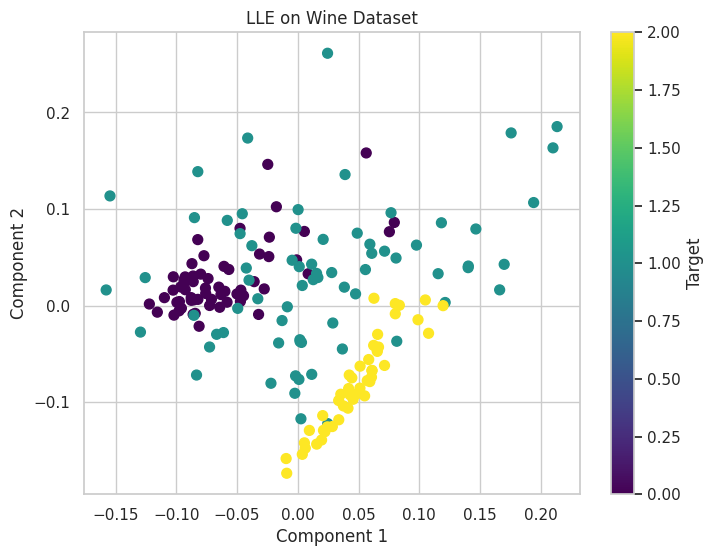

In [4]:
# LLE on Wine dataset
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
wine_lle = lle.fit_transform(wine_scaled)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(wine_lle[:, 0], wine_lle[:, 1], c=wine.target, cmap='viridis', s=50)
plt.colorbar(label="Target")
plt.title("LLE on Wine Dataset")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


# T-SNE

In [5]:
# t-SNE on Digits dataset
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
digits_tsne = tsne.fit_transform(digits_scaled)

# Interactive visualization using Plotly
fig = px.scatter(
    x=digits_tsne[:, 0],
    y=digits_tsne[:, 1],
    color=digits.target.astype(str),
    labels={'x': 'Component 1', 'y': 'Component 2', 'color': 'Target'},
    title="t-SNE on Digits Dataset"
)
fig.show()


# ISOMAP

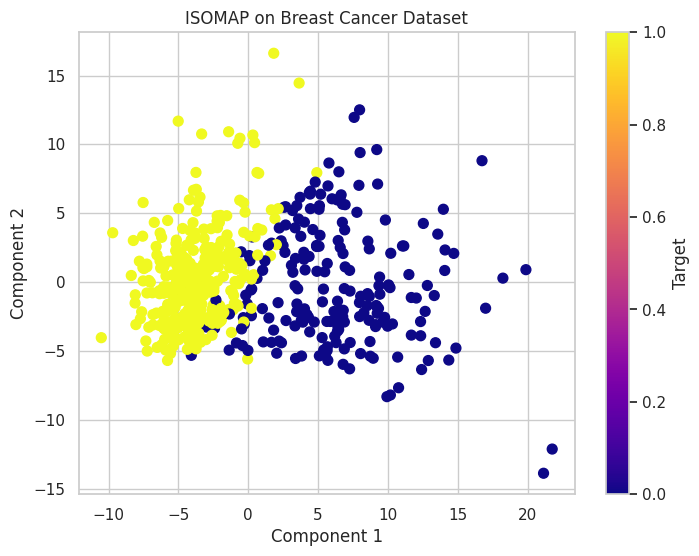

In [6]:
# ISOMAP on Breast Cancer dataset
isomap = Isomap(n_components=2, n_neighbors=10)
bc_isomap = isomap.fit_transform(bc_scaled)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(bc_isomap[:, 0], bc_isomap[:, 1], c=breast_cancer.target, cmap='plasma', s=50)
plt.colorbar(label="Target")
plt.title("ISOMAP on Breast Cancer Dataset")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


#  UMAP

In [7]:
# UMAP on Digits dataset
umap_model = umap.UMAP(n_components=2, random_state=42)
digits_umap = umap_model.fit_transform(digits_scaled)

# Interactive visualization
fig = px.scatter(
    x=digits_umap[:, 0],
    y=digits_umap[:, 1],
    color=digits.target.astype(str),
    labels={'x': 'Component 1', 'y': 'Component 2', 'color': 'Target'},
    title="UMAP on Digits Dataset"
)
fig.show()


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



#  Multi Dimensional Scaling

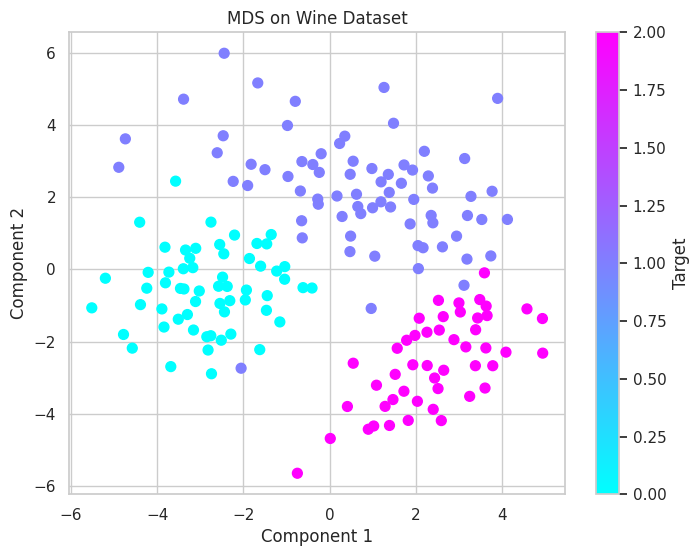

In [8]:
# MDS on Wine dataset
mds = MDS(n_components=2, random_state=42)
wine_mds = mds.fit_transform(wine_scaled)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(wine_mds[:, 0], wine_mds[:, 1], c=wine.target, cmap='cool', s=50)
plt.colorbar(label="Target")
plt.title("MDS on Wine Dataset")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


#  Randomized PCA

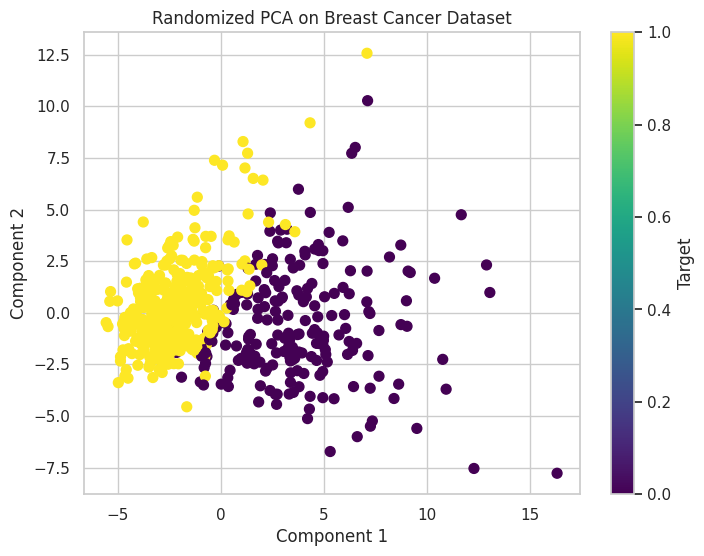

In [9]:
# Randomized PCA on Breast Cancer dataset
randomized_pca = PCA(n_components=2, svd_solver='randomized', random_state=42)
bc_randomized_pca = randomized_pca.fit_transform(bc_scaled)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(bc_randomized_pca[:, 0], bc_randomized_pca[:, 1], c=breast_cancer.target, cmap='viridis', s=50)
plt.colorbar(label="Target")
plt.title("Randomized PCA on Breast Cancer Dataset")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


#  Kernel PCA

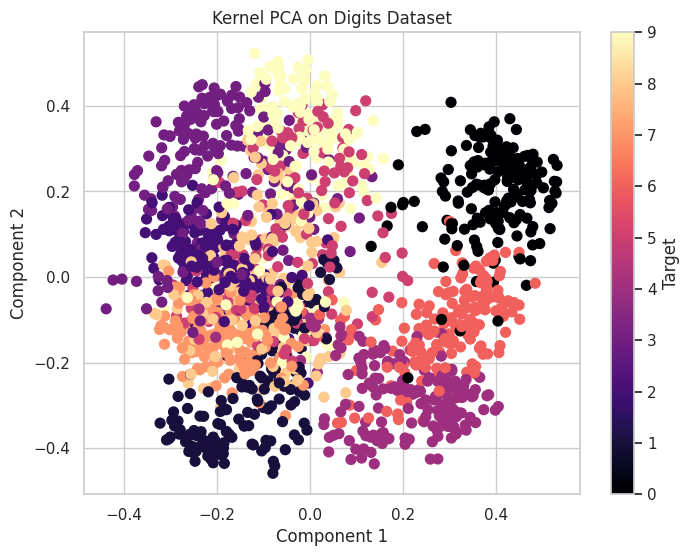

In [10]:
# Kernel PCA on Digits dataset
kernel_pca = KernelPCA(n_components=2, kernel='rbf')
digits_kernel_pca = kernel_pca.fit_transform(digits_scaled)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(digits_kernel_pca[:, 0], digits_kernel_pca[:, 1], c=digits.target, cmap='magma', s=50)
plt.colorbar(label="Target")
plt.title("Kernel PCA on Digits Dataset")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


# Incremental PCA

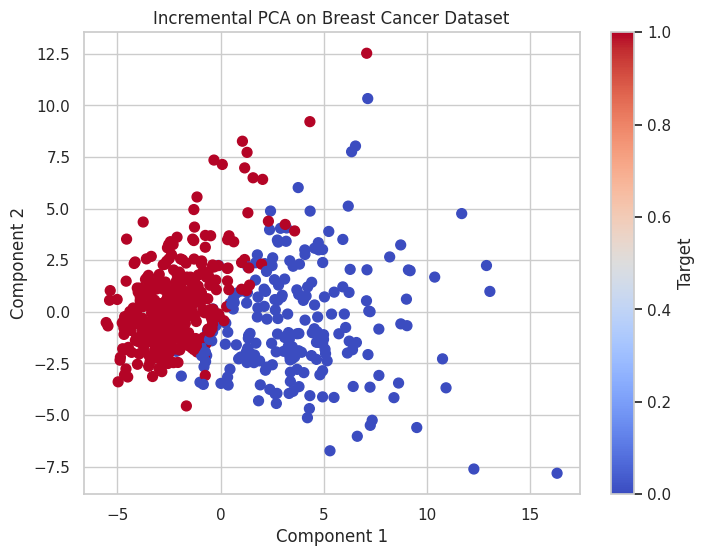

In [11]:
# Incremental PCA on Breast Cancer dataset
incremental_pca = IncrementalPCA(n_components=2)
bc_incremental_pca = incremental_pca.fit_transform(bc_scaled)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(bc_incremental_pca[:, 0], bc_incremental_pca[:, 1], c=breast_cancer.target, cmap='coolwarm', s=50)
plt.colorbar(label="Target")
plt.title("Incremental PCA on Breast Cancer Dataset")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


# Factor Analysis

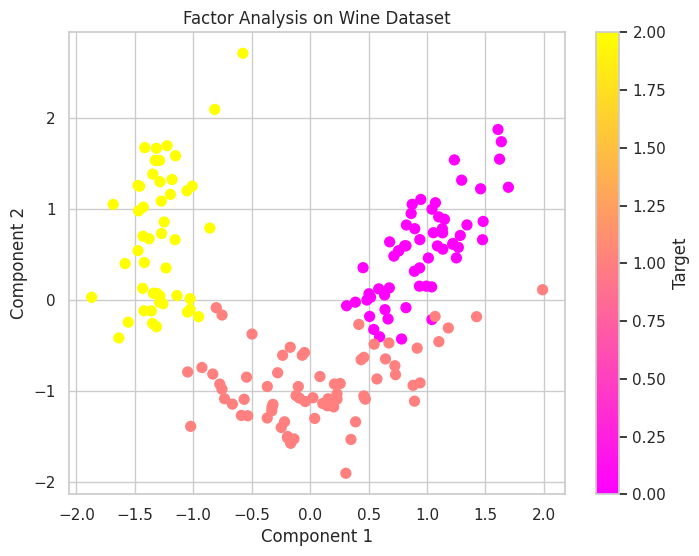

In [12]:
# Factor Analysis on Wine dataset
fa = FactorAnalysis(n_components=2, random_state=42)
wine_fa = fa.fit_transform(wine_scaled)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(wine_fa[:, 0], wine_fa[:, 1], c=wine.target, cmap='spring', s=50)
plt.colorbar(label="Target")
plt.title("Factor Analysis on Wine Dataset")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


# Auto Encoders

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


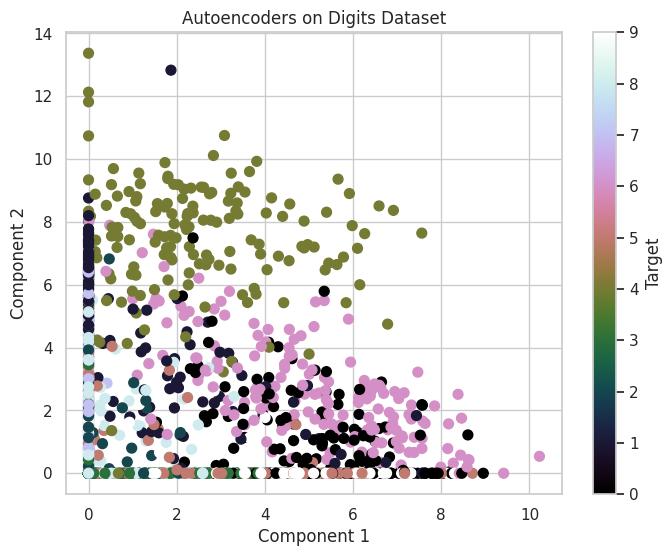

In [13]:
# Autoencoder on Digits dataset
input_dim = digits_scaled.shape[1]
encoding_dim = 2  # Compression to 2D

# Build the autoencoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = Model(input_layer, decoded)

# Encoder model to get reduced dimensions
encoder = Model(input_layer, encoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(digits_scaled, digits_scaled, epochs=50, batch_size=256, shuffle=True, verbose=0)

# Transform data
digits_autoencoded = encoder.predict(digits_scaled)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(digits_autoencoded[:, 0], digits_autoencoded[:, 1], c=digits.target, cmap='cubehelix', s=50)
plt.colorbar(label="Target")
plt.title("Autoencoders on Digits Dataset")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()
